In [18]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
df = pd.read_csv('summary.csv')

In [20]:
info_keys = [ 
    'unroll',
]
keys = [
    'lut_used',
    'lutmem_used',
    'bram_used',
    'dsp_used',
    'reg_used',
    'runtime_avg',
]

Text(0.5, 0.07, 'Misalgined Unrolling (Partitioning = 8) - Absolute Resource Usages')

<Figure size 432x288 with 0 Axes>

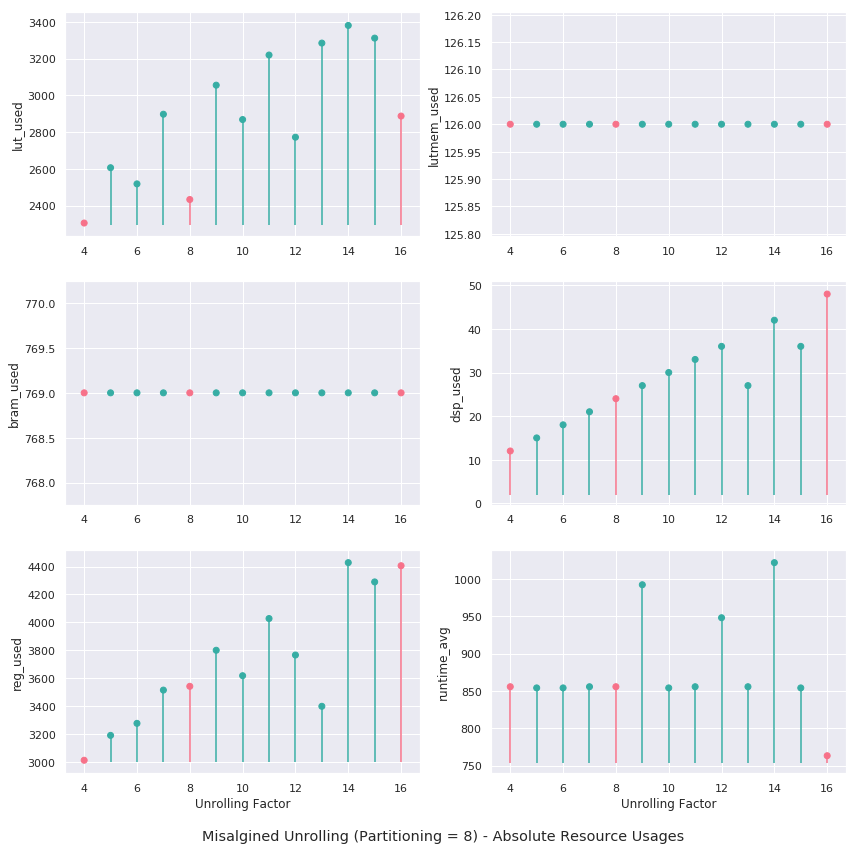

In [98]:
import math
plt.figure()
sns.set()

# Configuration for subplot
cols = 2
rows = int(len(keys) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 14))
pal = sns.color_palette('husl', 8).as_hex()

for idx, key in enumerate(keys):
    # Get current axes for the subplot
    ax = axes[int(idx / cols), idx % cols]
    plt.sca(ax)
    # Manually add each point to the current scatter plot.
    # This lets us control the color and shape of point.
    small_df = df[['unroll', key]].copy().sort_values(by='unroll')
    my_color = np.where(128 % small_df['unroll'] == 0, pal[0], pal[4])
    ymin = small_df.min()[key] - min(small_df.std()[key] * 10, 10)
    plt.vlines(x='unroll', ymax=key, data=small_df, ymin=ymin, color=my_color)
    plt.scatter(x='unroll', y=key, data=small_df, color=my_color)
    plt.ylabel(key)
        
for col in range(cols):
    axes[rows - 1, col].set(xlabel='Unrolling Factor')
    
fig.suptitle('Misalgined Unrolling (Partitioning = 8) - Absolute Resource Usages', y=0.07)

In [99]:
fig.savefig('absolute.png', dpi=300)